# Problem Statement:-
Every year a lot of companies hire a number of employees. The companies invest time and money in training those employees, not just this but there are training programs within the companies for their existing employees as well. The aim of these programs is to increase the effectiveness of their employees. But where HR Analytics fit in this? and is it just about improving the performance of employees?

##### HR Analytics
Human resource analytics (HR analytics) is an area in the field of analytics that refers to applying analytic processes to the human resource department of an organization in the hope of improving employee performance and therefore getting a better return on investment. HR analytics does not just deal with gathering data on employee efficiency. Instead, it aims to provide insight into each process by gathering data and then using it to make relevant decisions about how to improve these processes.

##### Attrition in HR
Attrition in human resources refers to the gradual loss of employees overtime. In general, relatively high attrition is problematic for companies. HR professionals often assume a leadership role in designing company compensation programs, work culture, and motivation systems that help the organization retain top employees. How does Attrition affect companies? and how does HR Analytics help in analyzing attrition? We will discuss the first question here and for the second question, we will write the code and try to understand the process step by step.

##### Attrition affecting Companies
A major problem in high employee attrition is its cost to an organization. Job postings, hiring processes, paperwork, and new hire training are some of the common expenses of losing employees and replacing them. Additionally, regular employee turnover prohibits your organization from increasing its collective knowledge base and experience over time. This is especially concerning if your business is customer-facing, as customers often prefer to interact with familiar people. Errors and issues are more likely if you constantly have new workers.

Dataset Link- • https://github.com/dsrscientist/IBM_HR_Attrition_Rate_Analytics

In [1]:
# Import necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load the data

df=pd.read_csv(r'C:\Users\arunk\Downloads\ibm-hr-analytics-employee-attrition-performance.zip')

In [3]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


# Exploratory Data Analysis

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [5]:
df.shape

(1470, 35)

There are total of 1470 rows and 35 columns.

There are no null vaalues present in the dataset.

In [6]:
df.duplicated().sum()

0

There are no duplicated values present either

In [7]:
df.nunique()

Age                           43
Attrition                      2
BusinessTravel                 3
DailyRate                    886
Department                     3
DistanceFromHome              29
Education                      5
EducationField                 6
EmployeeCount                  1
EmployeeNumber              1470
EnvironmentSatisfaction        4
Gender                         2
HourlyRate                    71
JobInvolvement                 4
JobLevel                       5
JobRole                        9
JobSatisfaction                4
MaritalStatus                  3
MonthlyIncome               1349
MonthlyRate                 1427
NumCompaniesWorked            10
Over18                         1
OverTime                       2
PercentSalaryHike             15
PerformanceRating              2
RelationshipSatisfaction       4
StandardHours                  1
StockOptionLevel               4
TotalWorkingYears             40
TrainingTimesLastYear          7
WorkLifeBa

Some of the columns have only 1 unique value. So, we will remove them.

In [8]:
df.drop(columns=['StandardHours','Over18','EmployeeCount'],inplace=True)

In [9]:
df.nunique()

Age                           43
Attrition                      2
BusinessTravel                 3
DailyRate                    886
Department                     3
DistanceFromHome              29
Education                      5
EducationField                 6
EmployeeNumber              1470
EnvironmentSatisfaction        4
Gender                         2
HourlyRate                    71
JobInvolvement                 4
JobLevel                       5
JobRole                        9
JobSatisfaction                4
MaritalStatus                  3
MonthlyIncome               1349
MonthlyRate                 1427
NumCompaniesWorked            10
OverTime                       2
PercentSalaryHike             15
PerformanceRating              2
RelationshipSatisfaction       4
StockOptionLevel               4
TotalWorkingYears             40
TrainingTimesLastYear          7
WorkLifeBalance                4
YearsAtCompany                37
YearsInCurrentRole            19
YearsSince

We can see that the column 'EmployeeNumber' is nothing but unique no. for every employee. So, It will not be necessary to keep it.

In [10]:
df=df.drop(columns=['EmployeeNumber'])

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EnvironmentSatisfaction   1470 non-null   int64 
 9   Gender                    1470 non-null   object
 10  HourlyRate                1470 non-null   int64 
 11  JobInvolvement            1470 non-null   int64 
 12  JobLevel                  1470 non-null   int64 
 13  JobRole                   1470 non-null   object
 14  JobSatisfaction         

Let's make list of categorical columns and numerical columns

In [12]:
cc=[]
for a in df.dtypes.index:
    if df.dtypes[a]=='object':
        cc.append(a)

In [13]:
cc

['Attrition',
 'BusinessTravel',
 'Department',
 'EducationField',
 'Gender',
 'JobRole',
 'MaritalStatus',
 'OverTime']

In [14]:
nc=[]
for v in df.dtypes.index:
    if df.dtypes[v]!='object':
        nc.append(v)

In [15]:
nc

['Age',
 'DailyRate',
 'DistanceFromHome',
 'Education',
 'EnvironmentSatisfaction',
 'HourlyRate',
 'JobInvolvement',
 'JobLevel',
 'JobSatisfaction',
 'MonthlyIncome',
 'MonthlyRate',
 'NumCompaniesWorked',
 'PercentSalaryHike',
 'PerformanceRating',
 'RelationshipSatisfaction',
 'StockOptionLevel',
 'TotalWorkingYears',
 'TrainingTimesLastYear',
 'WorkLifeBalance',
 'YearsAtCompany',
 'YearsInCurrentRole',
 'YearsSinceLastPromotion',
 'YearsWithCurrManager']

# Data Visualisation

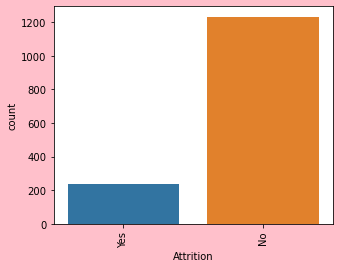

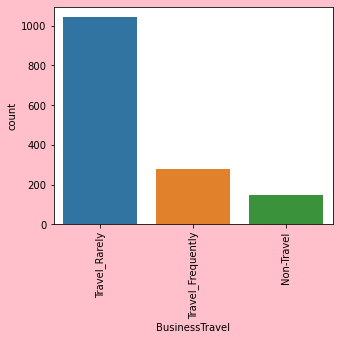

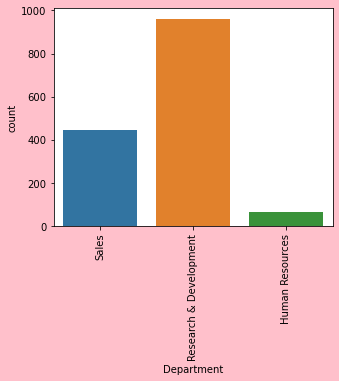

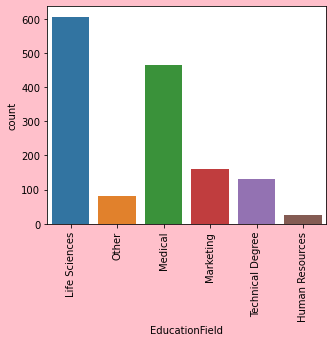

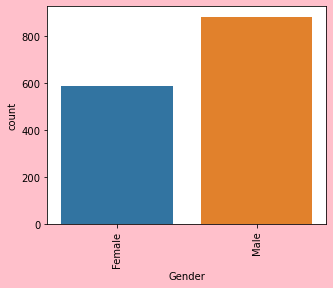

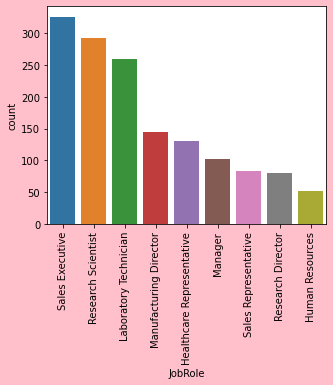

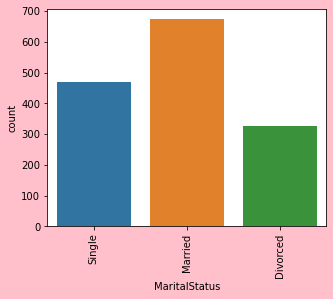

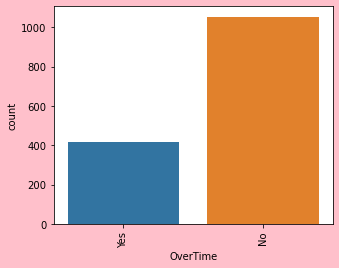

In [16]:

for c in cc:
    plt.figure(figsize=(5,4),facecolor='pink')
    sns.countplot(x=c,data=df)
    plt.xticks(rotation=90)
    plt.show()

In [17]:
df.nunique()

Age                           43
Attrition                      2
BusinessTravel                 3
DailyRate                    886
Department                     3
DistanceFromHome              29
Education                      5
EducationField                 6
EnvironmentSatisfaction        4
Gender                         2
HourlyRate                    71
JobInvolvement                 4
JobLevel                       5
JobRole                        9
JobSatisfaction                4
MaritalStatus                  3
MonthlyIncome               1349
MonthlyRate                 1427
NumCompaniesWorked            10
OverTime                       2
PercentSalaryHike             15
PerformanceRating              2
RelationshipSatisfaction       4
StockOptionLevel               4
TotalWorkingYears             40
TrainingTimesLastYear          7
WorkLifeBalance                4
YearsAtCompany                37
YearsInCurrentRole            19
YearsSinceLastPromotion       16
YearsWithC

<AxesSubplot:>

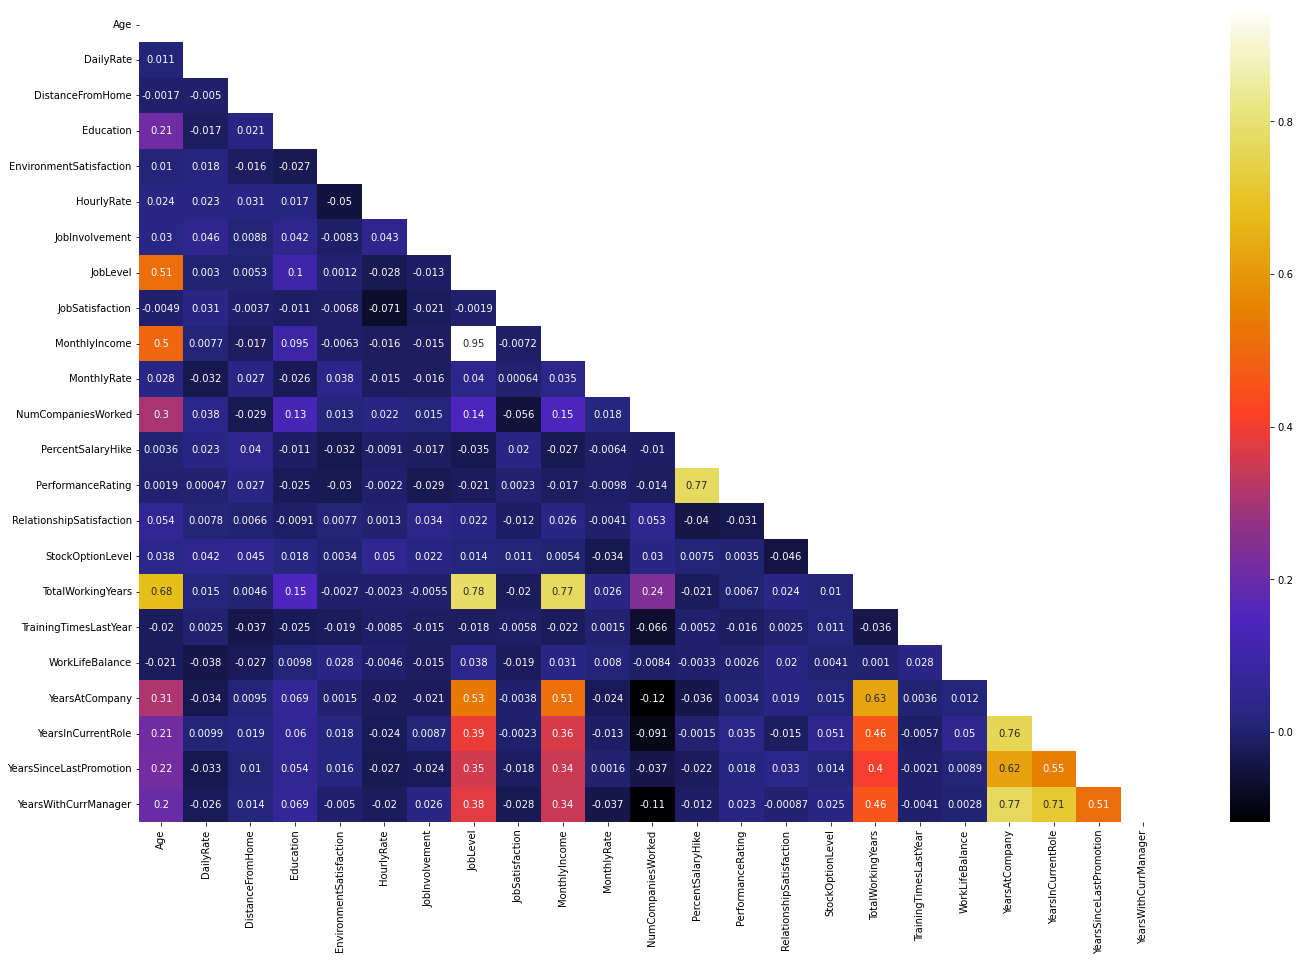

In [18]:
plt.figure(figsize=(23,15))
sns.heatmap(df.corr(),mask=np.triu(df.corr()),cmap='CMRmap',annot=True)

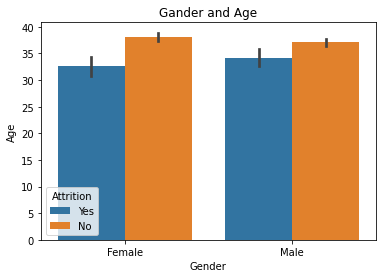

<Figure size 504x576 with 0 Axes>

In [19]:
plt.title('Gander and Age')
sns.barplot(x='Gender',y='Age',hue='Attrition',data=df)
plt.figure(figsize=(7,8))
plt.show()

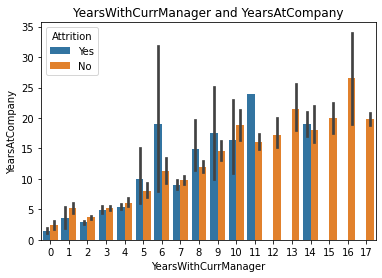

In [20]:
plt.title('YearsWithCurrManager and YearsAtCompany')
sns.barplot(x='YearsWithCurrManager',y='YearsAtCompany',hue='Attrition',data=df)
plt.show()

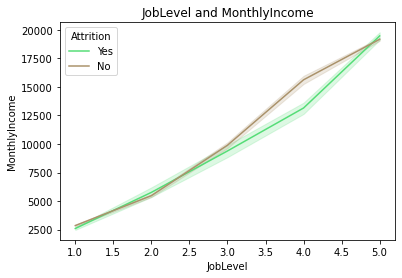

In [21]:
plt.title('JobLevel and MonthlyIncome')
sns.lineplot(x='JobLevel',y='MonthlyIncome',hue='Attrition',markers='D',data=df,palette="terrain")
plt.show()

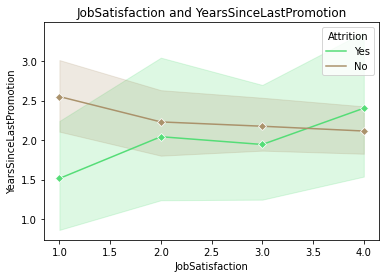

In [22]:
plt.title('JobSatisfaction and YearsSinceLastPromotion')
sns.lineplot(x='JobSatisfaction',y='YearsSinceLastPromotion',hue='Attrition',data=df,marker='D',palette="terrain")
plt.show()

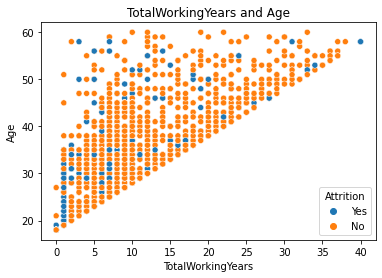

In [23]:
plt.title('TotalWorkingYears and Age')
sns.scatterplot(x='TotalWorkingYears',y='Age',hue='Attrition',data=df)
plt.show()

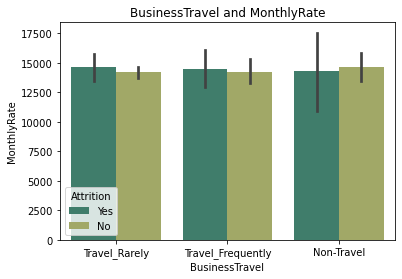

In [24]:
plt.title('BusinessTravel and MonthlyRate')
sns.barplot(x='BusinessTravel',y='MonthlyRate',hue='Attrition',data=df,palette="gist_earth")
plt.show()

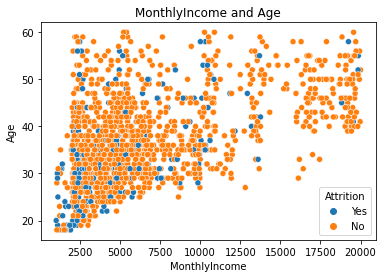

In [25]:
plt.title('MonthlyIncome and Age')
sns.scatterplot(x='MonthlyIncome',y='Age',hue='Attrition',data=df)
plt.show()

# Encoding

In [26]:
df.replace({'Attrition':{'Yes':1,'No':0}},inplace=True)

In [27]:
df['Attrition'].value_counts()

0    1233
1     237
Name: Attrition, dtype: int64

Now encode the features

In [28]:
from sklearn.preprocessing import OrdinalEncoder

In [29]:
cc

['Attrition',
 'BusinessTravel',
 'Department',
 'EducationField',
 'Gender',
 'JobRole',
 'MaritalStatus',
 'OverTime']

In [30]:
oe=OrdinalEncoder()
oe.fit(df[['BusinessTravel','Department','EducationField','Gender','JobRole','MaritalStatus','OverTime']])

OrdinalEncoder()

In [31]:
df[['BusinessTravel','Department','EducationField','Gender','JobRole','MaritalStatus','OverTime']]=oe.transform(df[['BusinessTravel','Department','EducationField','Gender','JobRole','MaritalStatus','OverTime']])

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       1470 non-null   int64  
 1   Attrition                 1470 non-null   int64  
 2   BusinessTravel            1470 non-null   float64
 3   DailyRate                 1470 non-null   int64  
 4   Department                1470 non-null   float64
 5   DistanceFromHome          1470 non-null   int64  
 6   Education                 1470 non-null   int64  
 7   EducationField            1470 non-null   float64
 8   EnvironmentSatisfaction   1470 non-null   int64  
 9   Gender                    1470 non-null   float64
 10  HourlyRate                1470 non-null   int64  
 11  JobInvolvement            1470 non-null   int64  
 12  JobLevel                  1470 non-null   int64  
 13  JobRole                   1470 non-null   float64
 14  JobSatis

We have successfully encoded the data.

Now we will look for the correlation

<AxesSubplot:>

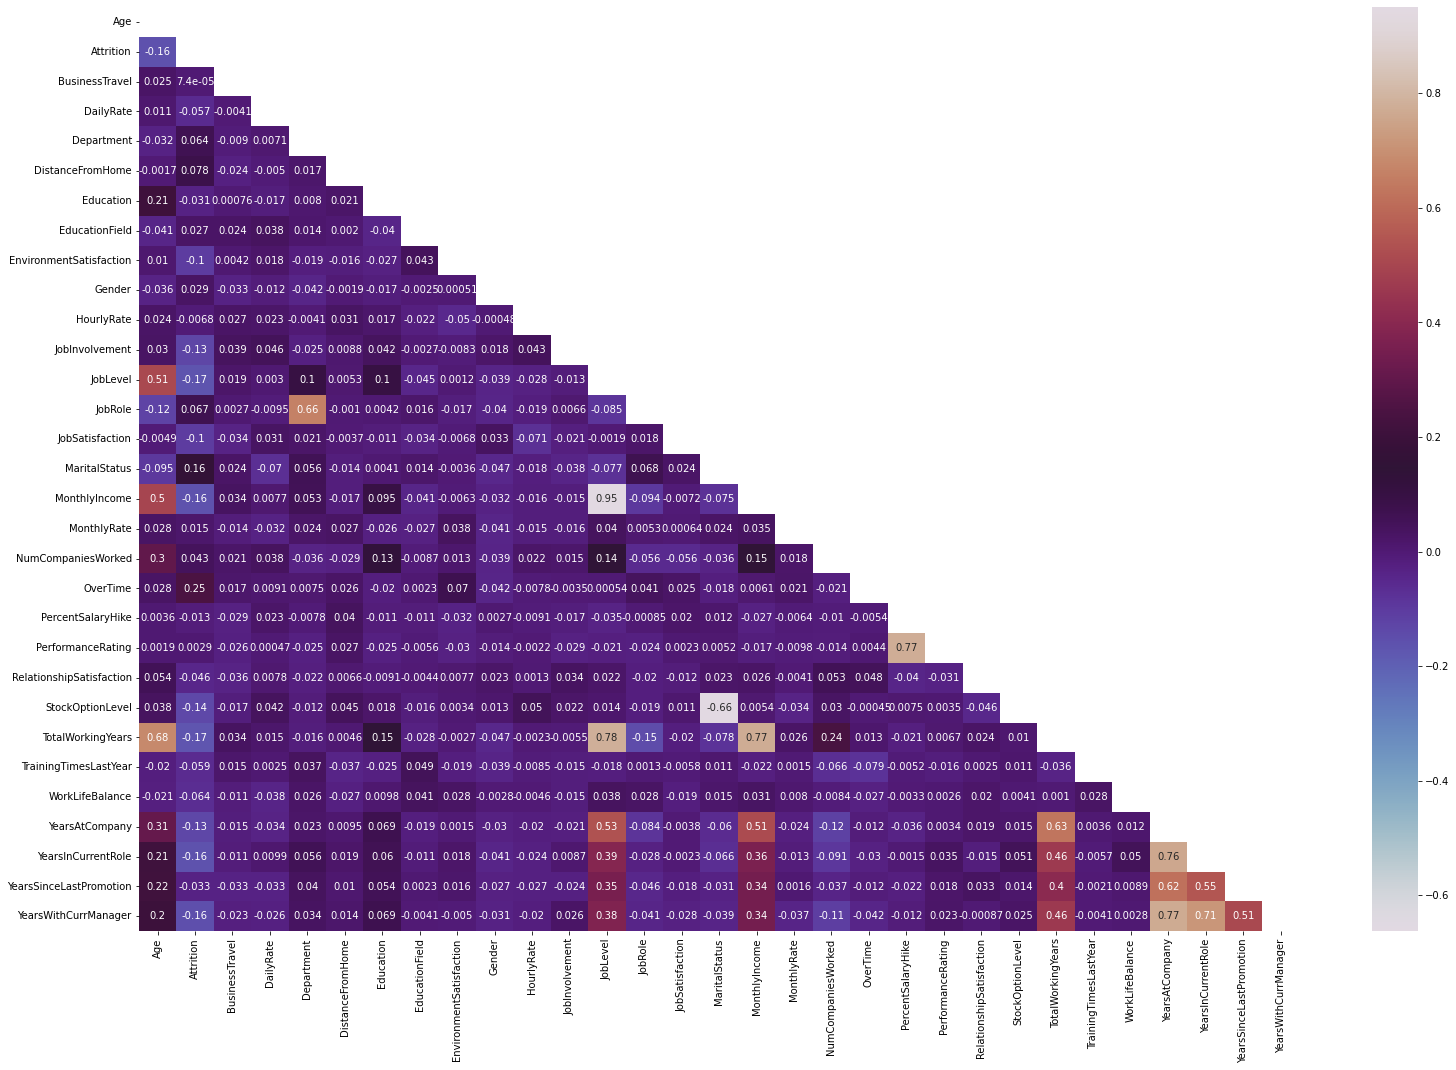

In [33]:
plt.figure(figsize=(26,17))
sns.heatmap(df.corr(),annot=True,cmap='twilight',mask=np.triu(df.corr()))

Some columns have correlation between them, we will look for correlation further as well.

In [34]:
df.describe()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,0.161224,1.607483,802.485714,1.260544,9.192517,2.912925,2.247619,2.721769,0.600000,...,3.153741,2.712245,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,0.367863,0.665455,403.509100,0.527792,8.106864,1.024165,1.331369,1.093082,0.490065,...,0.360824,1.081209,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,0.000000,0.000000,102.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,...,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,0.000000,1.000000,465.000000,1.000000,2.000000,2.000000,1.000000,2.000000,0.000000,...,3.000000,2.000000,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,0.000000,2.000000,802.000000,1.000000,7.000000,3.000000,2.000000,3.000000,1.000000,...,3.000000,3.000000,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,0.000000,2.000000,1157.000000,2.000000,14.000000,4.000000,3.000000,4.000000,1.000000,...,3.000000,4.000000,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1.000000,2.000000,1499.000000,2.000000,29.000000,5.000000,5.000000,4.000000,1.000000,...,4.000000,4.000000,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [35]:
df.shape

(1470, 31)

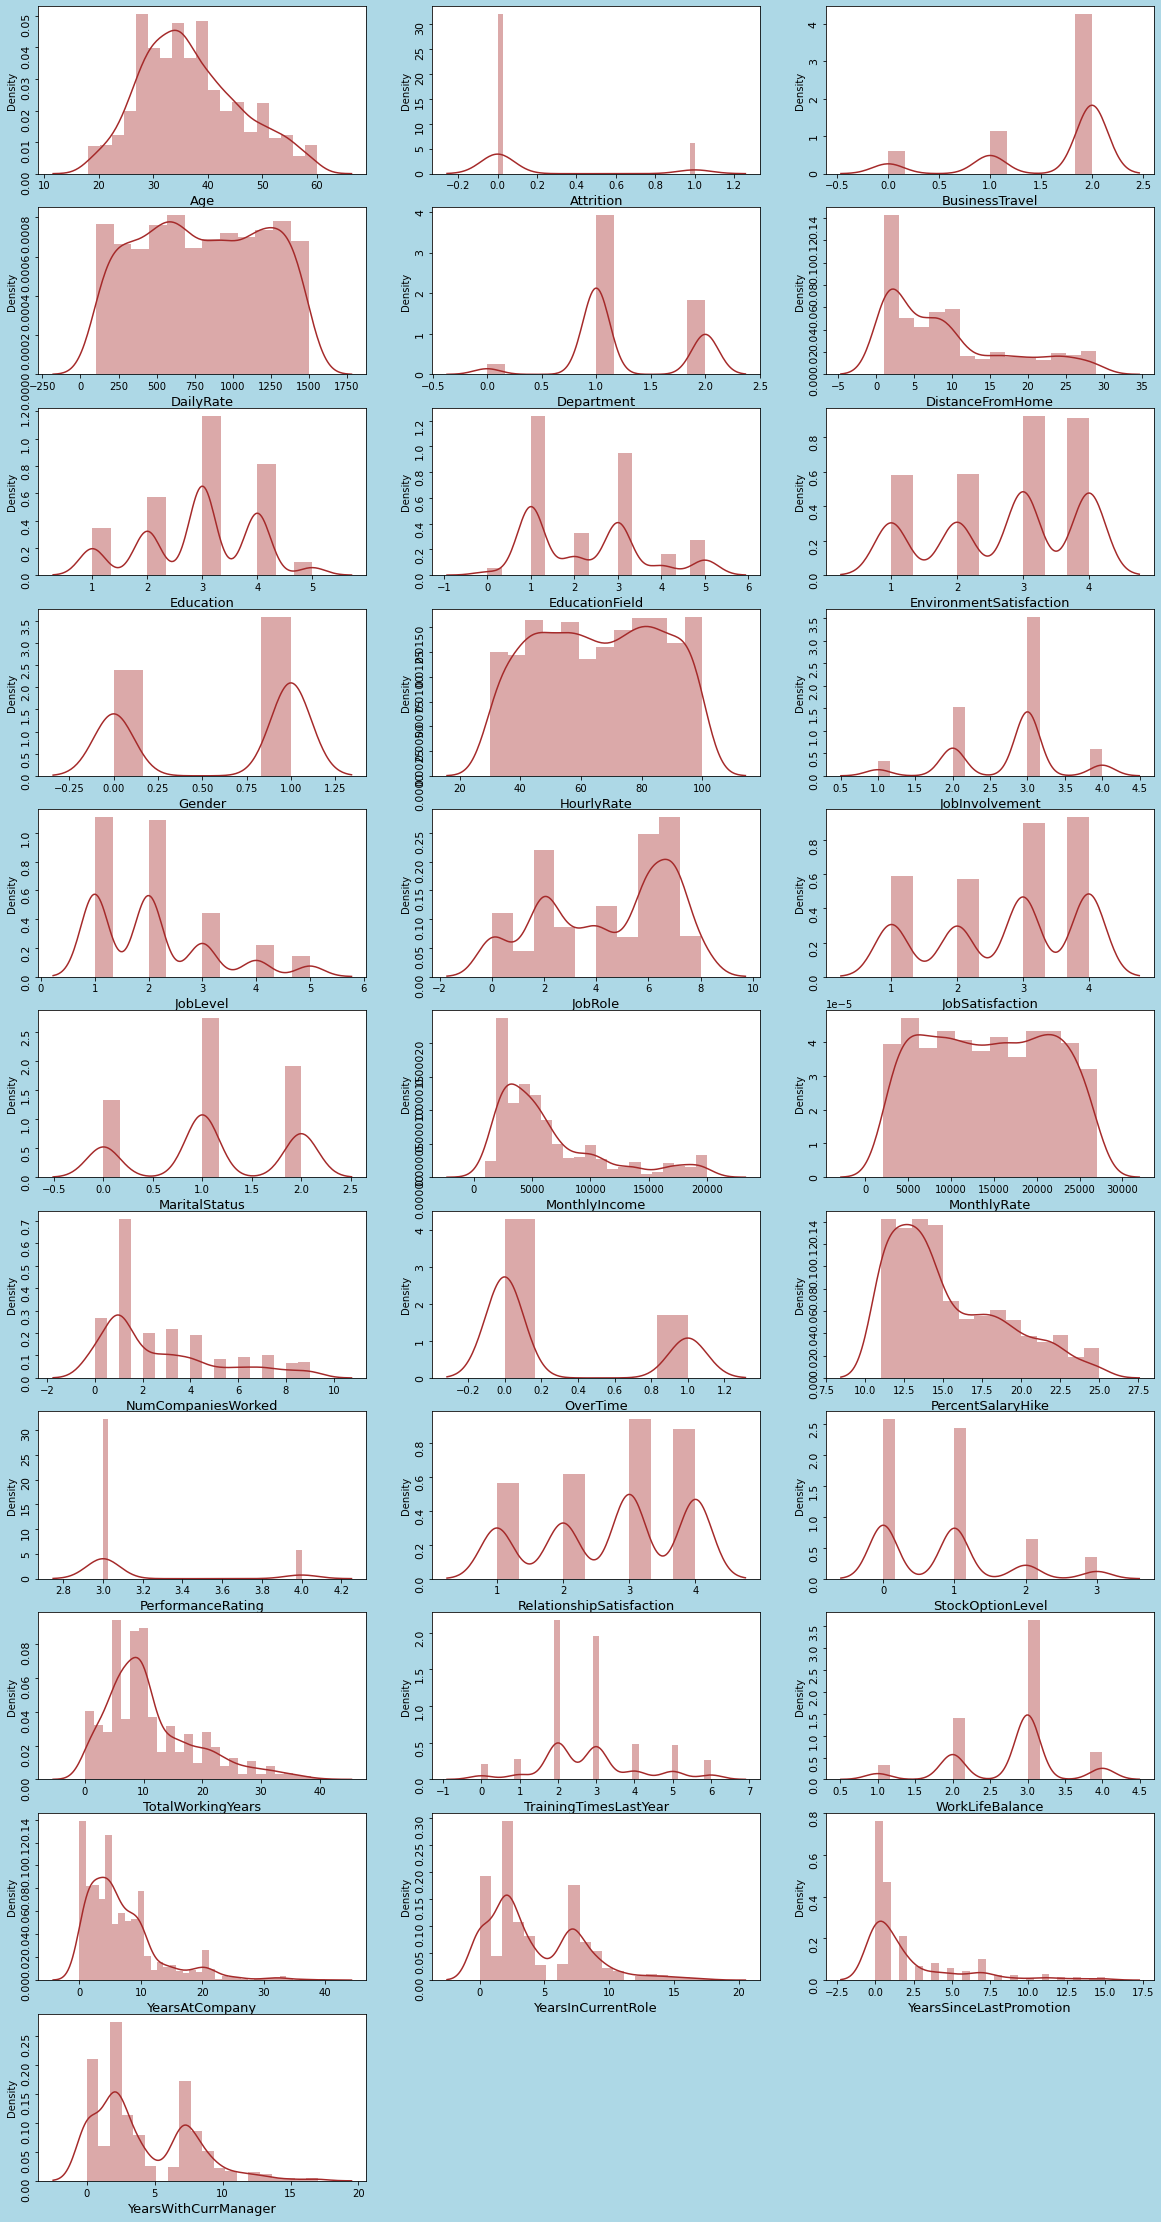

In [36]:
plt.figure(figsize=(20,40),facecolor='lightblue')
pn=1
for c in df:
    if pn<=31:
        ax=plt.subplot(11,3,pn)
        sns.distplot(df[c],color='brown')
        plt.xlabel(c,fontsize=13)
        plt.yticks(rotation=90,fontsize=11)
    pn+=1

We can observe that there are some columns which have skewness present in them

Let's look if there are outliers present in the dataset.

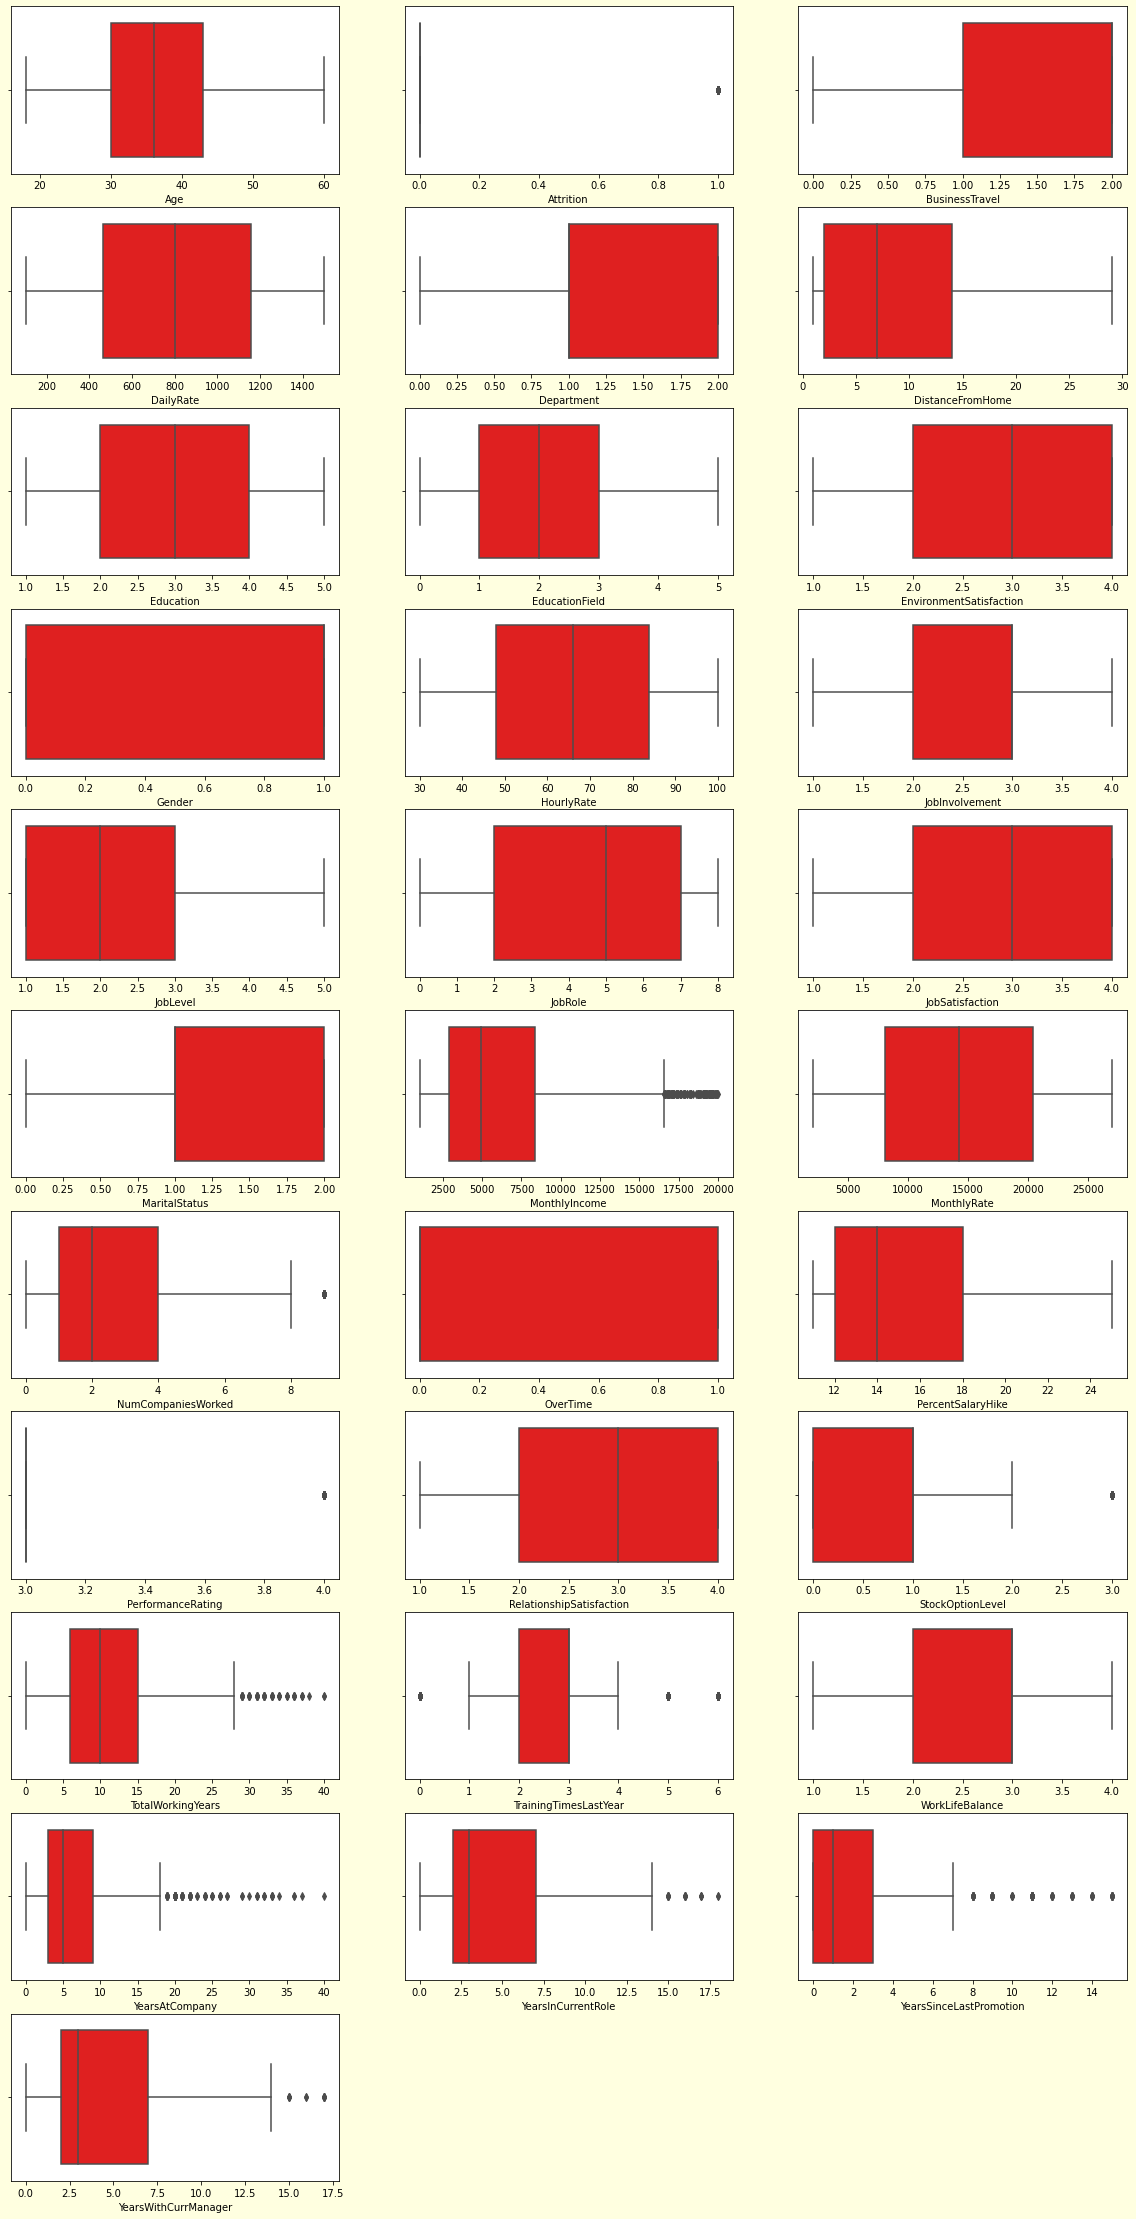

In [37]:
plt.figure(figsize=(20,40),facecolor='lightyellow')
p=1
for c in df:
    if p<=31:
        x=plt.subplot(11,3,p)
        sns.boxplot(df[c],color='r')
        plt.xlabel(c)
        plt.yticks(rotation=90)
    p+=1

We can observe that there are some columns like 'MonthlyIncome','NumCompaniesWorked' etc:- which have outliers present in them.

##### Removing Outliers

In [38]:
from scipy.stats import zscore
import numpy as np

z=np.abs(zscore(df))
z.shape

(1470, 31)

In [39]:
threshold=3
print(np.where(z>3))

(array([  28,   45,   62,   62,   63,   64,   85,   98,   98,  110,  123,
        123,  123,  126,  126,  126,  153,  178,  187,  187,  190,  190,
        218,  231,  231,  237,  237,  270,  270,  281,  326,  386,  386,
        401,  411,  425,  425,  427,  445,  466,  473,  477,  535,  561,
        561,  584,  592,  595,  595,  595,  616,  624,  635,  653,  653,
        677,  686,  701,  716,  746,  749,  752,  799,  838,  861,  861,
        875,  875,  894,  914,  914,  918,  922,  926,  926,  937,  956,
        962,  976,  976, 1008, 1024, 1043, 1078, 1078, 1086, 1086, 1093,
       1111, 1116, 1116, 1135, 1138, 1138, 1156, 1184, 1221, 1223, 1242,
       1295, 1301, 1301, 1303, 1327, 1331, 1348, 1351, 1401, 1414, 1430],
      dtype=int64), array([30, 29, 27, 29, 28, 29, 24, 24, 27, 29, 28, 29, 30, 24, 27, 29, 30,
       29, 24, 30, 27, 28, 29, 28, 30, 27, 29, 24, 27, 28, 29, 29, 30, 24,
       27, 27, 29, 29, 24, 28, 27, 27, 29, 27, 30, 29, 27, 24, 27, 29, 30,
       24, 30, 27, 29, 

In [40]:
df1=df[(z<3).all(axis=1)]

In [41]:
df1

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2.0,1102,2.0,1,2,1.0,2,0.0,...,3,1,0,8,0,1,6,4,0,5
1,49,0,1.0,279,1.0,8,1,1.0,3,1.0,...,4,4,1,10,3,3,10,7,1,7
2,37,1,2.0,1373,1.0,2,2,4.0,4,1.0,...,3,2,0,7,3,3,0,0,0,0
3,33,0,1.0,1392,1.0,3,4,1.0,4,0.0,...,3,3,0,8,3,3,8,7,3,0
4,27,0,2.0,591,1.0,2,1,3.0,1,1.0,...,3,4,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,0,1.0,884,1.0,23,2,3.0,3,1.0,...,3,3,1,17,3,3,5,2,0,3
1466,39,0,2.0,613,1.0,6,1,3.0,4,1.0,...,3,1,1,9,5,3,7,7,1,7
1467,27,0,2.0,155,1.0,4,3,1.0,2,1.0,...,4,2,1,6,0,3,6,2,0,3
1468,49,0,1.0,1023,2.0,2,3,3.0,4,1.0,...,3,4,0,17,3,2,9,6,0,8


In [42]:
(1470-1387)/1470*100

5.646258503401361

There is a total of 5.64% of dataloss after removing the outliers which is acceptable. about 10% of the data loss is acceptable.

In [43]:
df1['Attrition'].value_counts()

0    1158
1     229
Name: Attrition, dtype: int64

Data in the target variable in imbalanced, so we will fix it.

In [44]:
f=df1.drop(columns=['Attrition'])
l=df1['Attrition']

In [45]:
from imblearn.over_sampling import SMOTE
smt=SMOTE(random_state=4)
train_x,train_y=smt.fit_resample(f,l)
train_y.value_counts()

1    1158
0    1158
Name: Attrition, dtype: int64

In [46]:
dfn=pd.DataFrame(data=train_x)
dfn['Attrition']=train_y
dfn

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,...,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
0,41,2.000000,1102,2.000000,1,2,1.000000,2,0.000000,94,...,1,0,8,0,1,6,4,0,5,1
1,49,1.000000,279,1.000000,8,1,1.000000,3,1.000000,61,...,4,1,10,3,3,10,7,1,7,0
2,37,2.000000,1373,1.000000,2,2,4.000000,4,1.000000,92,...,2,0,7,3,3,0,0,0,0,1
3,33,1.000000,1392,1.000000,3,4,1.000000,4,0.000000,56,...,3,0,8,3,3,8,7,3,0,0
4,27,2.000000,591,1.000000,2,1,3.000000,1,1.000000,40,...,4,1,6,3,3,2,2,2,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2311,39,0.808488,447,1.191512,6,3,1.000000,1,0.808488,87,...,4,2,21,3,2,14,5,8,4,1
2312,29,1.538174,678,2.000000,9,2,1.461826,2,0.000000,65,...,1,0,4,1,2,2,2,2,0,1
2313,33,2.000000,937,2.000000,10,2,2.728514,4,0.728514,62,...,3,0,12,2,3,10,8,4,0,1
2314,28,1.000000,724,1.000000,9,2,3.997058,3,1.000000,72,...,3,0,4,3,2,3,2,1,2,1


Now there are total of 2466 rows and 31 columns.

In [47]:
x=dfn.drop(columns=['Attrition'])
y=dfn['Attrition']

In [48]:
x.skew()

Age                         0.564356
BusinessTravel             -1.405910
DailyRate                   0.074356
Department                  0.111511
DistanceFromHome            0.817138
Education                  -0.126454
EducationField              0.557938
EnvironmentSatisfaction    -0.017313
Gender                     -0.435736
HourlyRate                 -0.011497
JobInvolvement             -0.324229
JobLevel                    1.362182
JobRole                    -0.419209
JobSatisfaction            -0.039787
MaritalStatus              -0.318017
MonthlyIncome               1.723875
MonthlyRate                 0.010411
NumCompaniesWorked          0.959844
OverTime                    0.402913
PercentSalaryHike           0.803807
PerformanceRating           2.657239
RelationshipSatisfaction   -0.051208
StockOptionLevel            1.254705
TotalWorkingYears           1.166302
TrainingTimesLastYear       0.523583
WorkLifeBalance            -0.418268
YearsAtCompany              1.417935
Y

There is skewness present in some off the columns, so we will fix it.

In [49]:
x['BusinessTravel']=np.log1p(x['BusinessTravel'])
x['DistanceFromHome']=np.log1p(x['DistanceFromHome'])
x['JobLevel']=np.log1p(x['JobLevel'])
x['MonthlyIncome']=np.log1p(x['MonthlyIncome'])
x['NumCompaniesWorked']=np.log1p(x['NumCompaniesWorked'])
x['PercentSalaryHike']=np.log1p(x['PercentSalaryHike'])
x['PerformanceRating']=np.log1p(x['PerformanceRating'])
x['StockOptionLevel']=np.log1p(x['StockOptionLevel'])
x['TotalWorkingYears']=np.log1p(x['TotalWorkingYears'])
x['YearsAtCompany']=np.log1p(x['YearsAtCompany'])
x['YearsInCurrentRole']=np.log1p(x['YearsInCurrentRole'])
x['YearsSinceLastPromotion']=np.log1p(x['YearsSinceLastPromotion'])
x['YearsWithCurrManager']=np.log1p(x['YearsWithCurrManager'])

In [50]:
x.skew()

Age                         0.564356
BusinessTravel             -1.954555
DailyRate                   0.074356
Department                  0.111511
DistanceFromHome           -0.205761
Education                  -0.126454
EducationField              0.557938
EnvironmentSatisfaction    -0.017313
Gender                     -0.435736
HourlyRate                 -0.011497
JobInvolvement             -0.324229
JobLevel                    0.761584
JobRole                    -0.419209
JobSatisfaction            -0.039787
MaritalStatus              -0.318017
MonthlyIncome               0.418154
MonthlyRate                 0.010411
NumCompaniesWorked          0.020188
OverTime                    0.402913
PercentSalaryHike           0.487789
PerformanceRating           2.657239
RelationshipSatisfaction   -0.051208
StockOptionLevel            0.673359
TotalWorkingYears          -0.632320
TrainingTimesLastYear       0.523583
WorkLifeBalance            -0.418268
YearsAtCompany             -0.233384
Y

We can see that columns 'BusinessTravel' and 'PerformanceRating' still have skewness present in them, we will deal with these two columns later.

In [51]:
x.head()

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1.098612,1102,2.0,0.693147,2,1.0,2,0.0,94,...,1.386294,1,0.000000,2.197225,0,1,1.945910,1.609438,0.000000,1.791759
1,49,0.693147,279,1.0,2.197225,1,1.0,3,1.0,61,...,1.609438,4,0.693147,2.397895,3,3,2.397895,2.079442,0.693147,2.079442
2,37,1.098612,1373,1.0,1.098612,2,4.0,4,1.0,92,...,1.386294,2,0.000000,2.079442,3,3,0.000000,0.000000,0.000000,0.000000
3,33,0.693147,1392,1.0,1.386294,4,1.0,4,0.0,56,...,1.386294,3,0.000000,2.197225,3,3,2.197225,2.079442,1.386294,0.000000
4,27,1.098612,591,1.0,1.098612,1,3.0,1,1.0,40,...,1.386294,4,0.693147,1.945910,3,3,1.098612,1.098612,1.098612,1.098612


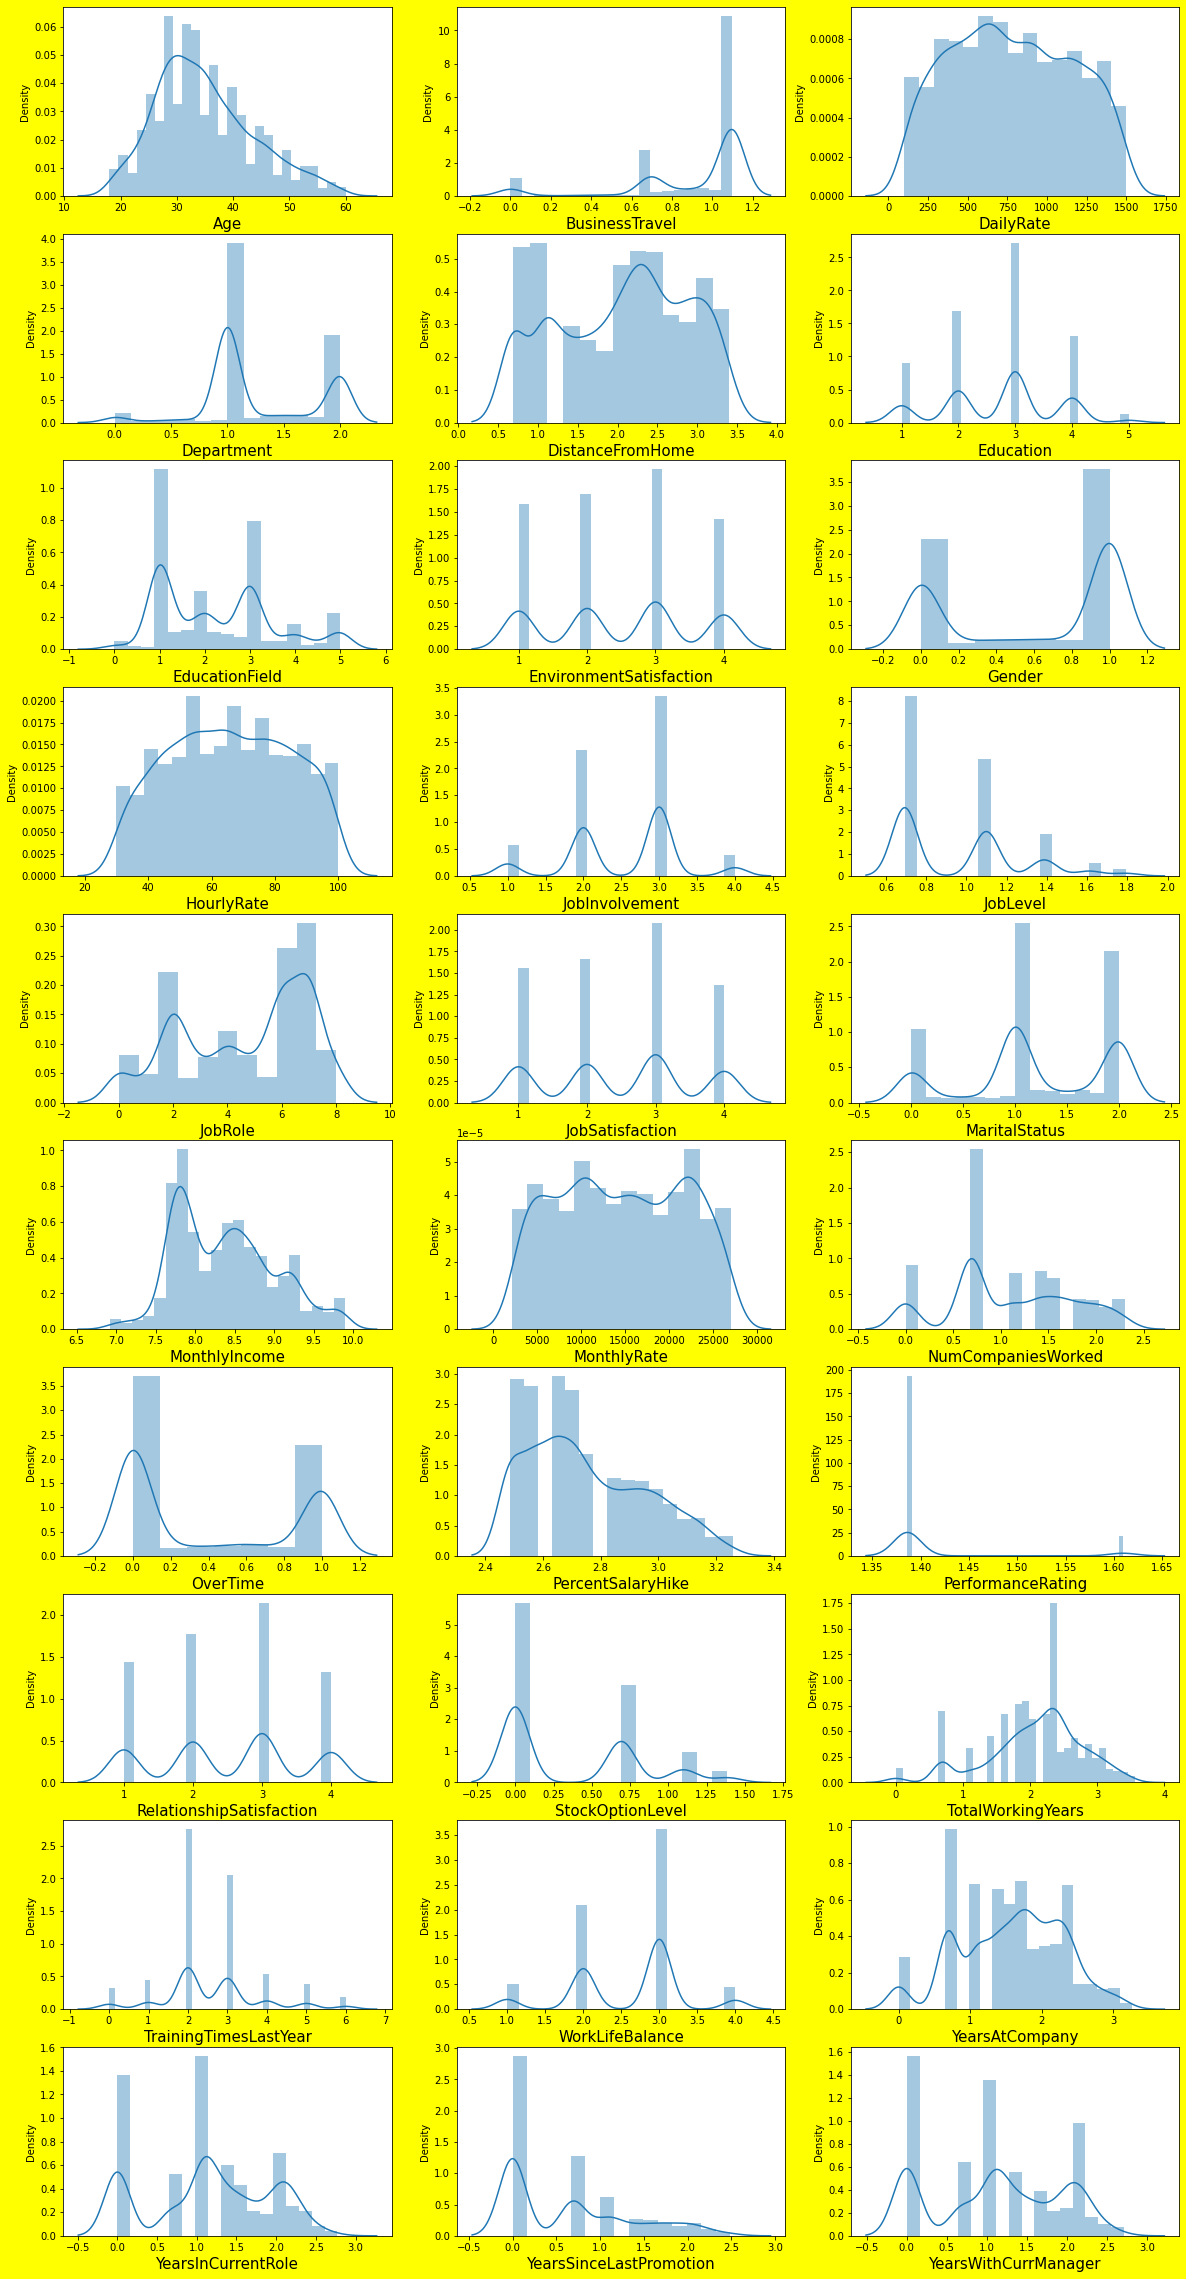

In [52]:
plt.figure(figsize=(20,41),facecolor='Yellow')
pltno=1

for c in x:
    if pltno<=30:
        ax=plt.subplot(10,3,pltno)
        sns.distplot(x[c])
        plt.xlabel(c,fontsize=15)
        
    pltno+=1

Now the Data Looks Better than before.

###### Standardising the data

In [53]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
scaled_x=sc.fit_transform(x)
scaled_x

array([[ 0.69729195,  0.59324638,  0.84726538, ...,  0.57862504,
        -0.88178715,  0.83294127],
       [ 1.61866018, -0.76671532, -1.32553884, ...,  1.18571913,
         0.07436534,  1.19273497],
       [ 0.23660784,  0.59324638,  1.56273311, ..., -1.50025304,
        -0.88178715, -1.40794836],
       ...,
       [-0.22407628,  0.59324638,  0.41164849, ...,  1.33785707,
         1.33833019, -1.40794836],
       [-0.79993142, -0.76671532, -0.1506933 , ..., -0.08119798,
         0.07436534, -0.03395318],
       [-1.95164171, -1.3745216 , -1.51562621, ..., -1.50025304,
        -0.88178715, -1.40794836]])

In [54]:
xx=pd.DataFrame(scaled_x,columns=x.columns)

In [55]:
xx

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,0.697292,0.593246,0.847265,1.414285,-1.683418,-0.724204,-0.993202,-0.451331,-1.333992,1.496486,...,-0.334452,-1.449182,-0.825003,0.153969,-2.112441,-2.211189,0.497226,0.578625,-0.881787,0.832941
1,1.618660,-0.766715,-1.325539,-0.545026,0.167861,-1.740107,-0.993202,0.480293,0.863186,-0.249194,...,2.989969,1.445849,0.741013,0.441516,0.337850,0.546546,1.128192,1.185719,0.074365,1.192735
2,0.236608,0.593246,1.562733,-0.545026,-1.184355,-0.724204,1.395664,1.411917,0.863186,1.390687,...,-0.334452,-0.484172,-0.825003,-0.014805,0.337850,0.546546,-2.219241,-1.500253,-0.881787,-1.407948
3,-0.224076,-0.766715,1.612895,-0.545026,-0.830265,1.307603,-0.993202,1.411917,-1.333992,-0.513690,...,-0.334452,0.480839,-0.825003,0.153969,0.337850,0.546546,0.848058,1.185719,1.030518,-1.407948
4,-0.915102,0.593246,-0.501827,-0.545026,-1.184355,-1.740107,0.599375,-1.382954,0.863186,-1.360081,...,-0.334452,1.445849,0.741013,-0.206146,0.337850,0.546546,-0.685592,-0.081198,0.633679,-0.033953
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2311,0.466950,-1.104323,-0.882002,-0.169795,-0.141467,0.291699,-0.993202,-1.382954,0.442400,1.126190,...,-0.334452,1.445849,1.657073,1.434746,0.337850,-0.832322,1.561164,0.814126,2.149145,0.604918
2312,-0.684760,0.032554,-0.272138,1.414285,0.297543,-0.724204,-0.625455,-0.451331,-1.333992,-0.037596,...,-0.334452,-1.449182,-0.825003,-0.688287,-1.295678,-0.832322,-0.685592,-0.081198,0.633679,-1.407948
2313,-0.224076,0.593246,0.411648,1.414285,0.414855,-0.724204,0.383194,1.411917,0.266683,-0.196294,...,-0.334452,0.480839,-0.825003,0.680892,-0.478914,0.546546,1.128192,1.337857,1.338330,-1.407948
2314,-0.799931,-0.766715,-0.150693,-0.545026,0.297543,-0.724204,1.393321,0.480293,0.863186,0.332700,...,-0.334452,0.480839,-0.825003,-0.688287,0.337850,-0.832322,-0.283991,-0.081198,0.074365,-0.033953


In [56]:
xx['Attrition']=y

In [57]:
xx

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,...,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
0,0.697292,0.593246,0.847265,1.414285,-1.683418,-0.724204,-0.993202,-0.451331,-1.333992,1.496486,...,-1.449182,-0.825003,0.153969,-2.112441,-2.211189,0.497226,0.578625,-0.881787,0.832941,1
1,1.618660,-0.766715,-1.325539,-0.545026,0.167861,-1.740107,-0.993202,0.480293,0.863186,-0.249194,...,1.445849,0.741013,0.441516,0.337850,0.546546,1.128192,1.185719,0.074365,1.192735,0
2,0.236608,0.593246,1.562733,-0.545026,-1.184355,-0.724204,1.395664,1.411917,0.863186,1.390687,...,-0.484172,-0.825003,-0.014805,0.337850,0.546546,-2.219241,-1.500253,-0.881787,-1.407948,1
3,-0.224076,-0.766715,1.612895,-0.545026,-0.830265,1.307603,-0.993202,1.411917,-1.333992,-0.513690,...,0.480839,-0.825003,0.153969,0.337850,0.546546,0.848058,1.185719,1.030518,-1.407948,0
4,-0.915102,0.593246,-0.501827,-0.545026,-1.184355,-1.740107,0.599375,-1.382954,0.863186,-1.360081,...,1.445849,0.741013,-0.206146,0.337850,0.546546,-0.685592,-0.081198,0.633679,-0.033953,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2311,0.466950,-1.104323,-0.882002,-0.169795,-0.141467,0.291699,-0.993202,-1.382954,0.442400,1.126190,...,1.445849,1.657073,1.434746,0.337850,-0.832322,1.561164,0.814126,2.149145,0.604918,1
2312,-0.684760,0.032554,-0.272138,1.414285,0.297543,-0.724204,-0.625455,-0.451331,-1.333992,-0.037596,...,-1.449182,-0.825003,-0.688287,-1.295678,-0.832322,-0.685592,-0.081198,0.633679,-1.407948,1
2313,-0.224076,0.593246,0.411648,1.414285,0.414855,-0.724204,0.383194,1.411917,0.266683,-0.196294,...,0.480839,-0.825003,0.680892,-0.478914,0.546546,1.128192,1.337857,1.338330,-1.407948,1
2314,-0.799931,-0.766715,-0.150693,-0.545026,0.297543,-0.724204,1.393321,0.480293,0.863186,0.332700,...,0.480839,-0.825003,-0.688287,0.337850,-0.832322,-0.283991,-0.081198,0.074365,-0.033953,1


<AxesSubplot:>

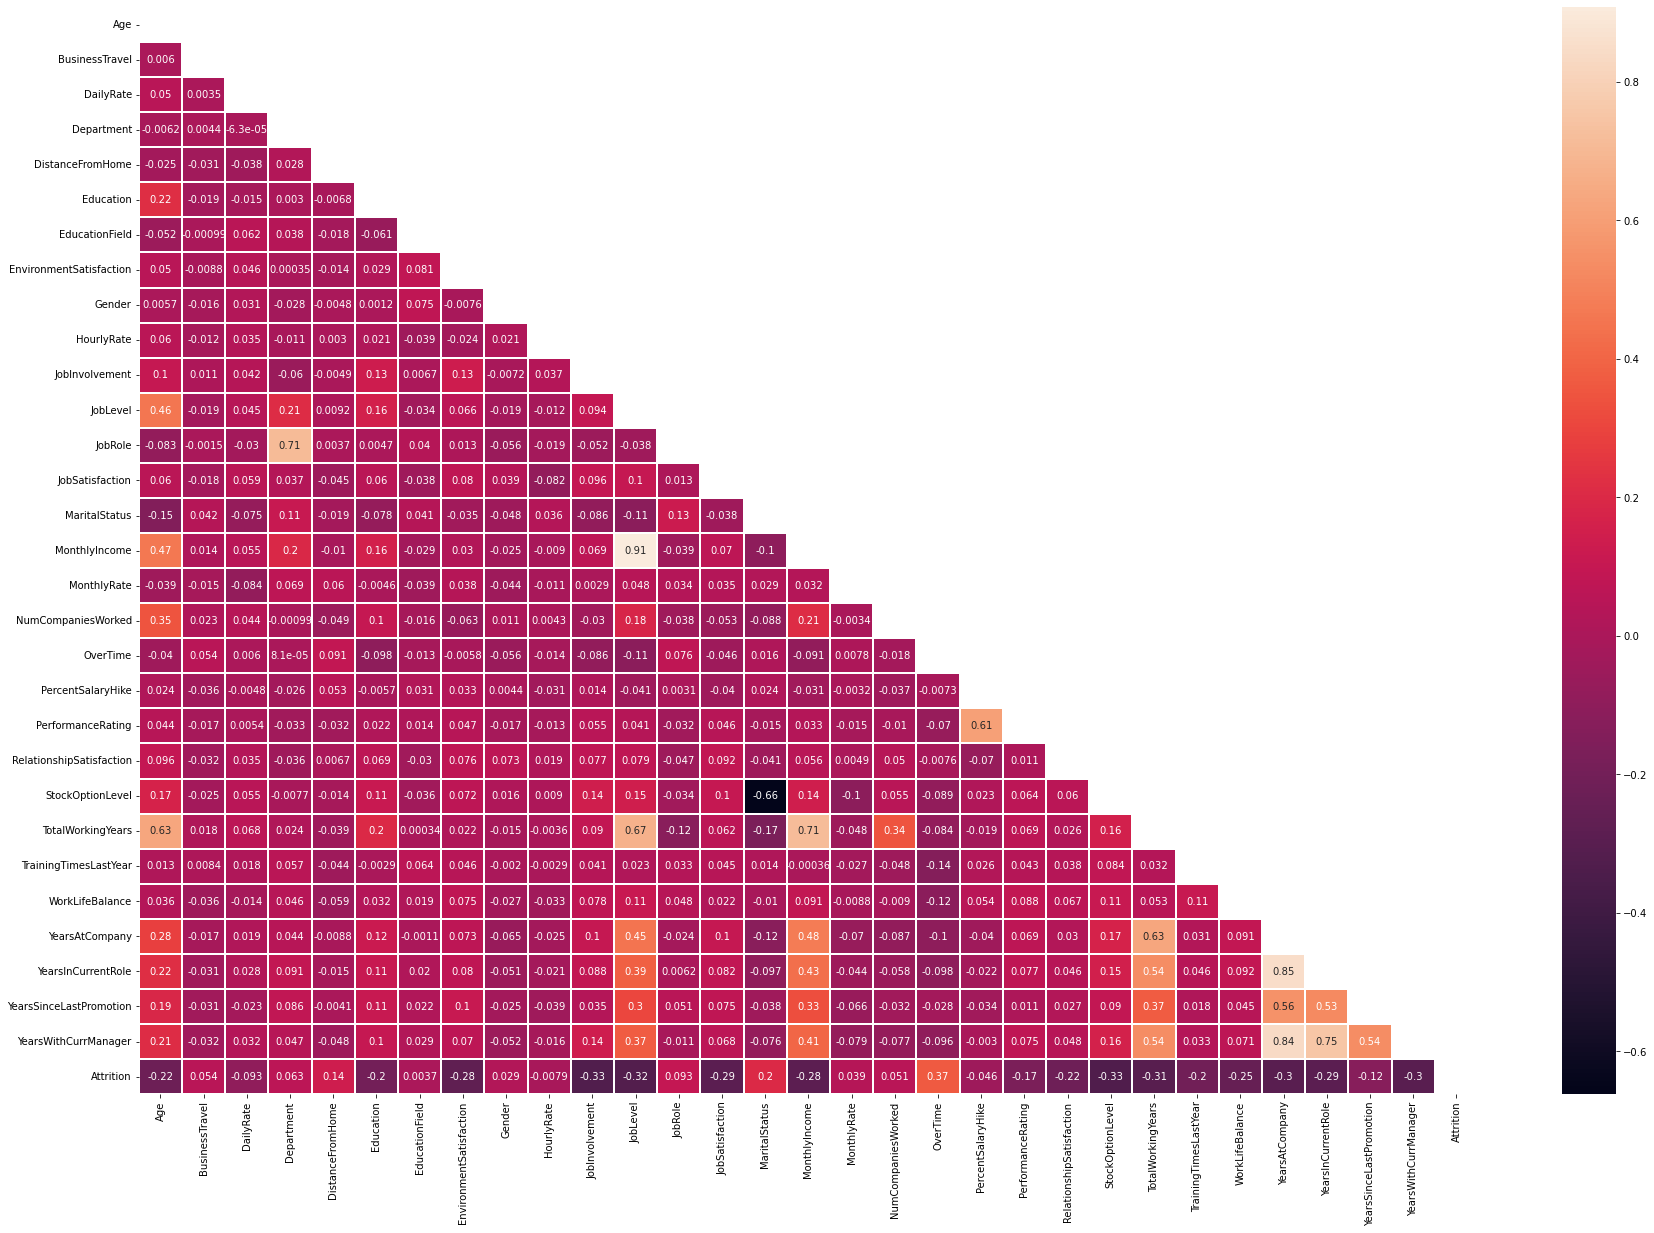

In [60]:
plt.figure(figsize=(30,20))
sns.heatmap(xx.corr(),annot=True,linewidths=0.01,mask=np.triu(xx.corr()))

'JobLevel' is highly correlated with 'MonthlyIncome'

'YearsAtCompany' is highly correlated with 'YearsInCurrentRole'

In [61]:
xx=xx.drop(columns=['JobLevel','YearsAtCompany'])

<AxesSubplot:>

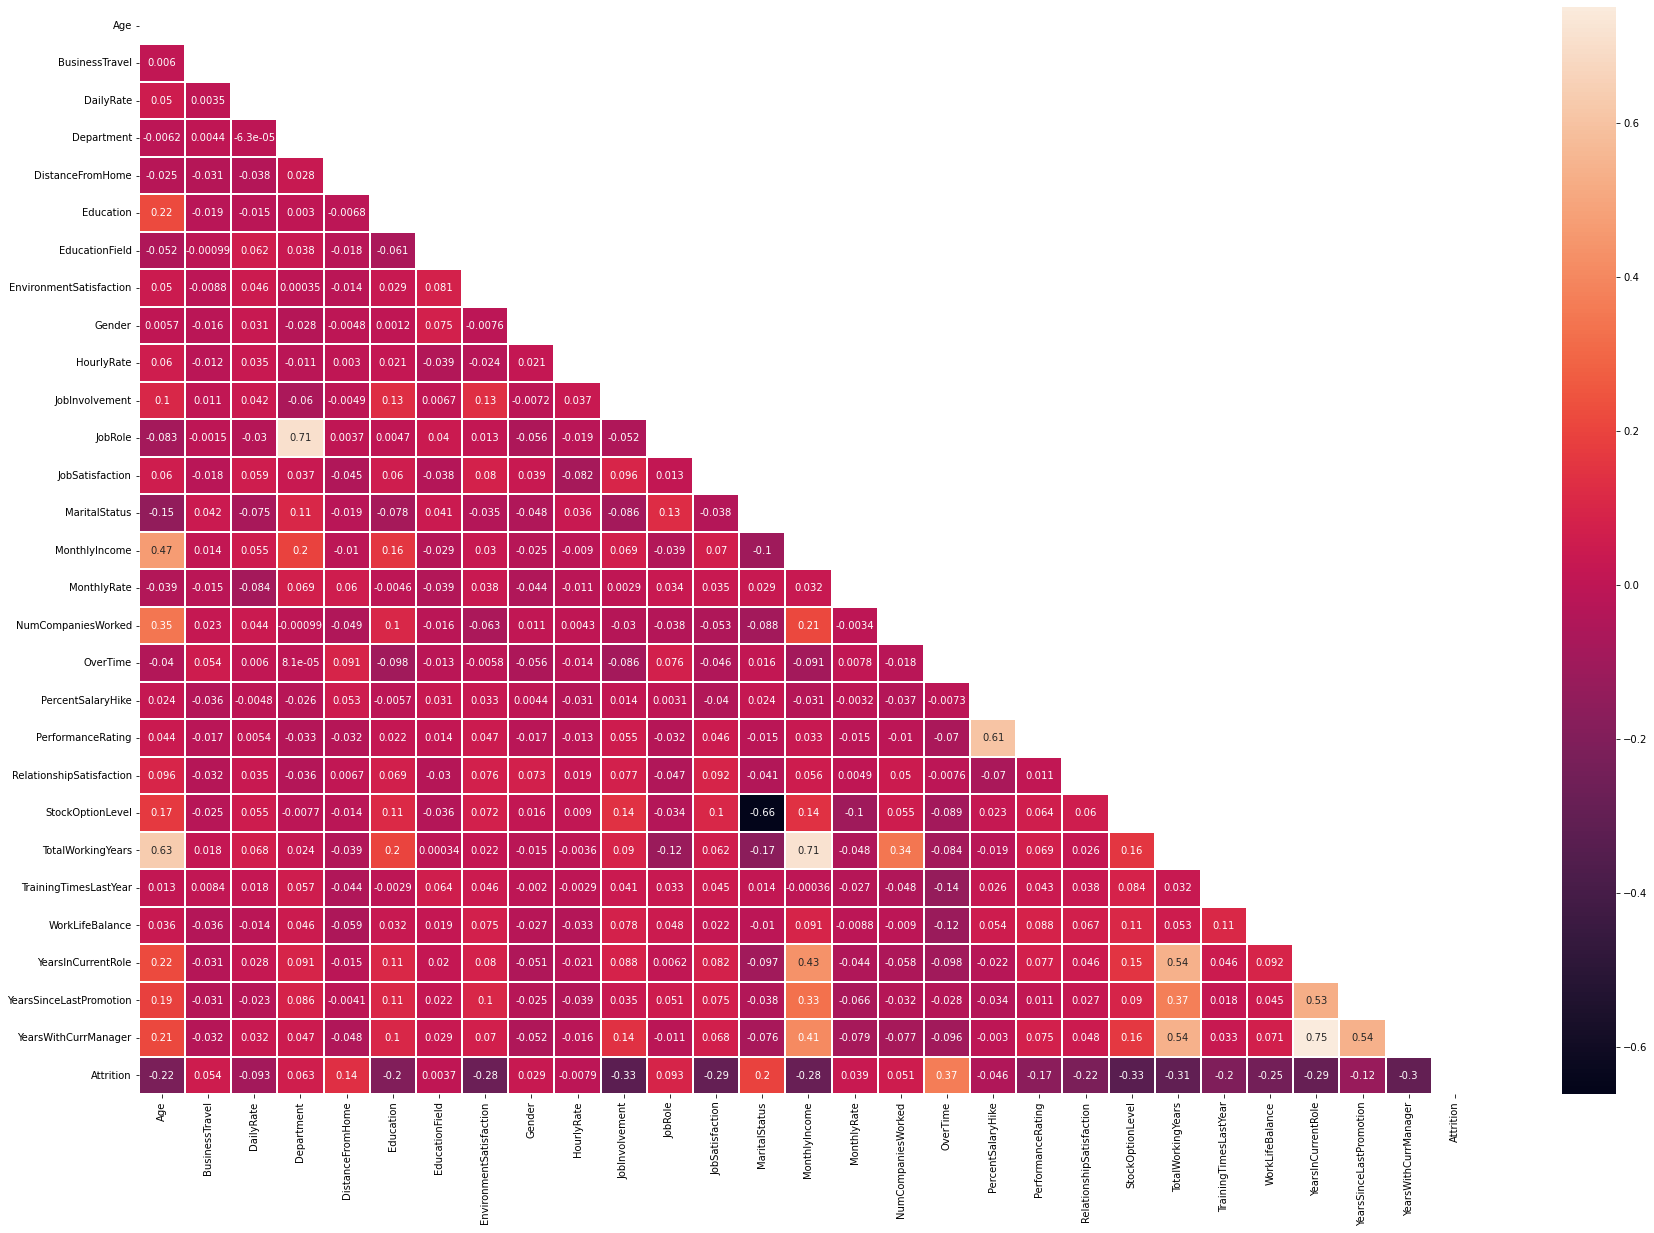

In [63]:
plt.figure(figsize=(30,20))
sns.heatmap(xx.corr(),annot=True,linewidth=0.01,mask=np.triu(xx.corr()))

In [64]:
x=xx.drop(columns=['Attrition'])
y=xx['Attrition']

Now we will check the viff values for multicollinearity

In [65]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [66]:
vif=pd.DataFrame()
vif['vif values']=[variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif['features']=x.columns

In [67]:
vif

,vif values,features
0,1.864624,Age
1,1.015622,BusinessTravel
2,1.036949,DailyRate
3,2.327593,Department
4,1.037159,DistanceFromHome
5,1.095106,Education
6,1.041859,EducationField
7,1.063816,EnvironmentSatisfaction
8,1.032998,Gender
9,1.029945,HourlyRate


Vif values of all the columns aree below 10.

we know that columns 'BusinessTravel' and 'PerformanceRating' had skewness in them which was not going away. So we will remove these two features.

In [68]:
x=x.drop(columns=['BusinessTravel','PerformanceRating'])

In [69]:
x.head()

,Age,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,...,OverTime,PercentSalaryHike,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,0.697292,0.847265,1.414285,-1.683418,-0.724204,-0.993202,-0.451331,-1.333992,1.496486,0.632499,...,1.326046,-1.320423,-1.449182,-0.825003,0.153969,-2.112441,-2.211189,0.578625,-0.881787,0.832941
1,1.618660,-1.325539,-0.545026,0.167861,-1.740107,-0.993202,0.480293,0.863186,-0.249194,-0.726376,...,-0.881622,2.079049,1.445849,0.741013,0.441516,0.337850,0.546546,1.185719,0.074365,1.192735
2,0.236608,1.562733,-0.545026,-1.184355,-0.724204,1.395664,1.411917,0.863186,1.390687,-0.726376,...,1.326046,0.090485,-0.484172,-0.825003,-0.014805,0.337850,0.546546,-1.500253,-0.881787,-1.407948
3,-0.224076,1.612895,-0.545026,-0.830265,1.307603,-0.993202,1.411917,-1.333992,-0.513690,0.632499,...,1.326046,-1.320423,0.480839,-0.825003,0.153969,0.337850,0.546546,1.185719,1.030518,-1.407948
4,-0.915102,-0.501827,-0.545026,-1.184355,-1.740107,0.599375,-1.382954,0.863186,-1.360081,0.632499,...,-0.881622,-0.927862,1.445849,0.741013,-0.206146,0.337850,0.546546,-0.081198,0.633679,-0.033953


# Model Building

In [71]:
y.value_counts()

1    1158
0    1158
Name: Attrition, dtype: int64

The target variable contains only 2 kind of values, so classification model will be build for this.

In [73]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import r2_score

In [74]:
ma=0
mr=0

for i in range(1,50):
    xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.25,random_state=i)
    lg=LogisticRegression()
    lg.fit(xtrain,ytrain)
    pred=lg.predict(xtest)
    acc=r2_score(ytest,pred)
    if acc>ma:
        ma=acc
        mr=i
print('Best Accuraccy is',ma,'on random state',mr)

Best Accuraccy is 0.535968899521531 on random state 39


The best random state is 39

In [75]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.25,random_state=39)

In [76]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [77]:
# LOGISTIC REGRESSION
lg=LogisticRegression()
lg.fit(xtrain,ytrain)
lp=lg.predict(xtest)
print(r2_score(ytest,lp))
print('mean absolute error:',mean_absolute_error(ytest,lp))
print('mean squared error:',mean_squared_error(ytest,lp))

0.535968899521531
mean absolute error: 0.1157167530224525
mean squared error: 0.1157167530224525


In [78]:
# RANDOMFOREST CLASSIFIER

r=RandomForestClassifier()
r.fit(xtrain,ytrain)
rp=r.predict(xtest)
print(r2_score(ytest,rp))
print('mean absolute error',mean_absolute_error(ytest,rp))
print('mean squared error',mean_squared_error(ytest,rp))

0.7368181818181818
mean absolute error 0.06563039723661486
mean squared error 0.06563039723661486


In [79]:
# SVC
ss=SVC()
ss.fit(xtrain,ytrain)
sp=ss.predict(xtest)
print(r2_score(ytest,sp))
print('mean absolute error',mean_absolute_error(ytest,sp))
print('mean squared error',mean_squared_error(ytest,sp))

0.6744856459330143
mean absolute error 0.08117443868739206
mean squared error 0.08117443868739206


In [80]:
# DECISIONTREE CLASSIFIER
d=DecisionTreeClassifier()
d.fit(xtrain,ytrain)
dp=d.predict(xtest)
print(r2_score(ytest,dp))
print('mean absolute error',mean_absolute_error(ytest,dp))
print('mean squared error',mean_squared_error(ytest,dp))

0.4597846889952153
mean absolute error 0.13471502590673576
mean squared error 0.13471502590673576


In [81]:
# KNEIGHBOR CLASSIFIER
k=KNeighborsClassifier()
k.fit(xtrain,ytrain)
kp=d.predict(xtest)
print(r2_score(ytest,kp))
print('mean absolute error',mean_absolute_error(ytest,kp))
print('mean squared error',mean_squared_error(ytest,kp))

0.4597846889952153
mean absolute error 0.13471502590673576
mean squared error 0.13471502590673576


# Crossvalidation Score

In [82]:
from sklearn.model_selection import cross_val_score

In [84]:
#for logistic regression

ls=cross_val_score(lg,x,y)
print(ls)
print(ls.mean())

[0.75646552 0.85961123 0.87904968 0.8574514  0.87041037]
0.8445976390854248


In [85]:
# for random forest classifier

rs=cross_val_score(r,x,y)
print(rs)
print(rs.mean())

[0.68318966 0.97192225 0.96328294 0.96328294 0.98272138]
0.912879831682431


In [86]:
# for svc

sc=cross_val_score(ss,x,y)
print(sc)
print(sc.mean())

[0.74568966 0.93520518 0.94384449 0.93736501 0.95680346]
0.9037815595442019


In [87]:
# for decisiontree classifier

ds=cross_val_score(d,x,y)
print(ds)
print(ds.mean())

[0.6637931  0.91144708 0.87904968 0.9049676  0.87688985]
0.8472294630222684


In [88]:
# for kneighbors classifier

ks=cross_val_score(k,x,y)
print(ks)
print(ks.mean())

[0.83405172 0.84449244 0.83801296 0.82721382 0.85313175]
0.8393805392120355


As per the obeservation, the RandomForest Classifier is the best model of all. so, we will do hyperparameter tuning on it.

# HyperParameter Tuning

In [89]:
from sklearn.model_selection import GridSearchCV

In [95]:
param={'max_features':['auto','sqrt','log2'],
      'max_depth':[5,10,15,20,25],
      'criterion':['gini','entropy']}

gcs=GridSearchCV(r,param,cv=5,scoring='accuracy')
gcs.fit(xtrain,ytrain)
gcs.best_params_

{'criterion': 'gini', 'max_depth': 15, 'max_features': 'log2'}

In [96]:
fmodel=RandomForestClassifier(max_features='log2',criterion='gini',max_depth=15)

In [97]:
fmodel.fit(xtrain,ytrain)
pred=fmodel.predict(xtest)
print(r2_score(ytest,pred))

0.7506698564593302


Our model gives accuracy of 75.06%

# Visualising ROC curve

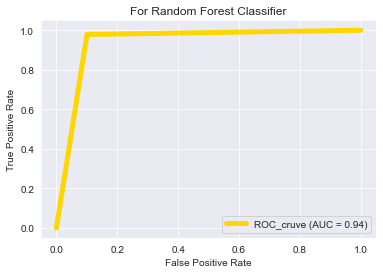

In [100]:
sns.set_style('darkgrid')
from sklearn import metrics
fpr, tpr, thresholds = metrics.roc_curve(pred, ytest)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc,estimator_name='ROC_cruve')
display.plot(lw=5,color='gold')
plt.title('For Random Forest Classifier')
plt.show()


# Saving the Model

In [101]:
import joblib
joblib.dump(fmodel,'HR_analytics')

['HR_analytics']

Model is now saved

# Loading the Model

In [103]:
m = joblib.load("HR_analytics")
pp=m.predict(xtest)
print(pp)

[0 0 1 1 1 1 1 0 0 1 1 1 0 1 0 1 0 1 1 0 0 1 0 0 0 0 0 0 1 0 0 0 1 1 0 0 1
 1 0 0 1 0 1 0 1 0 0 0 1 0 1 0 1 0 0 1 1 1 0 1 0 0 1 1 1 1 0 0 0 0 1 0 1 1
 0 1 1 0 1 0 0 0 1 1 1 1 0 0 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 0 1 1 0 1 0 1 0
 0 0 0 1 1 0 1 1 1 0 0 1 0 1 0 1 1 1 0 0 1 1 0 0 0 0 0 0 1 0 1 1 0 0 1 0 0
 1 0 0 1 0 1 1 1 0 1 1 1 1 1 1 1 1 0 0 1 0 0 0 1 0 0 1 0 0 0 1 1 1 0 0 0 1
 0 1 0 1 0 1 1 1 1 1 1 0 0 0 1 0 0 0 1 0 0 0 1 0 1 1 0 0 0 0 0 1 1 1 1 0 1
 0 0 0 1 0 0 1 0 0 1 1 0 0 0 1 1 0 1 0 0 1 1 1 0 1 1 1 0 0 0 0 1 1 1 0 1 0
 0 0 0 1 1 0 1 1 0 0 0 0 1 1 1 1 0 1 1 0 1 0 0 1 1 0 0 1 1 0 0 1 1 1 0 1 1
 0 1 0 0 1 0 1 1 0 0 0 1 1 0 1 1 1 1 0 0 1 1 0 0 0 0 1 0 0 0 1 1 0 0 0 0 1
 0 1 1 0 0 1 0 0 0 1 0 0 0 0 1 1 0 1 0 0 1 1 0 1 1 0 0 1 0 1 1 1 1 0 1 0 1
 0 1 1 1 0 1 1 1 0 0 1 0 0 0 1 1 0 1 0 1 1 1 0 1 1 0 0 0 1 1 0 1 0 1 0 0 0
 0 1 0 1 0 1 0 1 0 0 1 0 1 0 1 0 1 1 1 0 0 1 0 1 0 1 0 0 1 1 0 0 1 1 1 1 1
 0 0 0 0 0 1 0 1 0 1 0 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 0 0 0 0 0 0
 0 1 1 1 1 0 0 1 0 0 0 0 

In [104]:
d=pd.DataFrame({'predicted values':pp,'actual values':ytest})

In [105]:
d

,predicted values,actual values
742,0,0
257,0,0
2179,1,1
2024,1,1
1483,1,1
...,...,...
1522,1,1
1902,1,1
1322,0,0
1043,0,0
